In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
import datetime
import os
import sklearn
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = "retina"

https://github.com/tyiannak/pyAudioAnalysis

## initial attempt

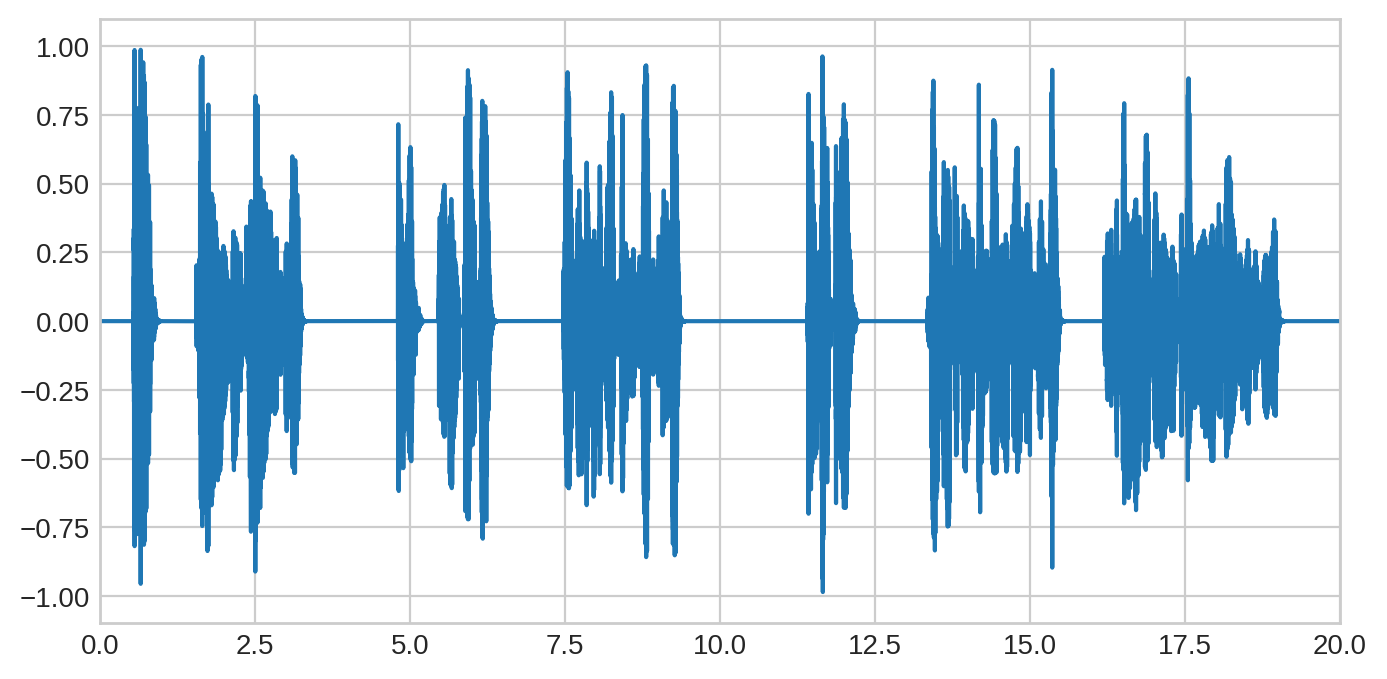

In [4]:
# load audio
filename = './data/Track 2.wav'
data, fs = sf.read(filename, dtype='float32')
time = np.linspace(0, len(data) / fs, num=len(data))

# creat channel name
prefix = 'channel_'
n_channels = data.shape[1]
n_str = np.arange(1, n_channels + 1, 1, dtype=str)
channels = [prefix + i for i in n_str]

# convert to pandas df
pd_data = pd.DataFrame(data, columns=channels)
pd_data['seconds'] = time

# visulise signal 
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(pd_data['seconds'], pd_data['channel_1'])

ax.set_xlim([0, 20])
plt.rc("figure", dpi=100)
plt.style.use("seaborn-whitegrid")
plt.show()

## inaSpeechSegmenter

https://github.com/ina-foss/inaSpeechSegmenter

In [5]:
# Load the API (Current warning is related to h5py and has no consequences)
from inaSpeechSegmenter import Segmenter, seg2csv
seg = Segmenter()

Using TensorFlow backend.


In [6]:
segments = seg(filename)
pd_segments = pd.DataFrame(segments).rename(columns={0:'Class', 1:'Start', 2:'Stop'})

In [18]:
pd_segments.head()

,Class,Start,Stop
0,noEnergy,0.00,0.52
1,female,0.52,0.88
2,noEnergy,0.88,1.54
3,male,1.54,3.26
4,noEnergy,3.26,4.78


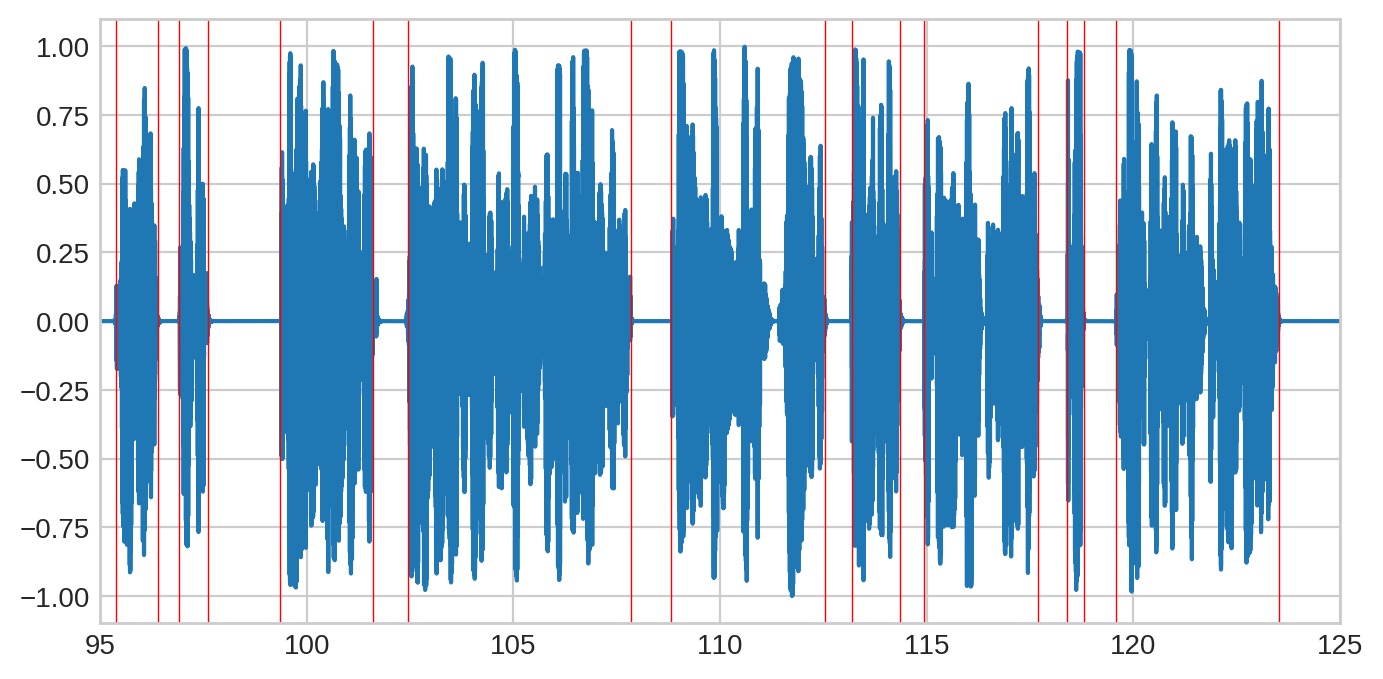

In [37]:
# visulise signal 
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(pd_data['seconds'], pd_data['channel_1'])
pd_pause = pd_segments[pd_segments.Class == 'noEnergy']
for i in range(len(pd_pause)):
    ax.axvline(x=pd_pause.iloc[i]['Start'], color='red', lw=0.5)
    ax.axvline(x=pd_pause.iloc[i]['Stop'], color='red', lw=0.5)

ax.set_xlim([95, 125])
plt.rc("figure", dpi=100)
plt.style.use("seaborn-whitegrid")
plt.show()

In [43]:
index = []

for i in range(len(pd_segments)):
    if pd_segments.iloc[i].Class == 'noEnergy':
        pause = pd_segments.iloc[i].Stop - pd_segments.iloc[i].Start
        if pause > .8:
            index.append(i)

seg = []
for i in range(1, len(index)):
    sentence = (pd_segments.iloc[index[i-1]].Start, pd_segments.iloc[index[i]].Start)
    print(sentence)

(3.2600000000000002, 6.34)
(6.34, 9.36)
(9.36, 12.18)
(12.18, 19.0)
(19.0, 24.44)
(24.44, 29.16)
(29.16, 32.06)
(32.06, 44.980000000000004)
(44.980000000000004, 51.7)
(51.7, 65.4)
(65.4, 70.8)
(70.8, 74.56)
(74.56, 83.42)
(83.42, 88.04)
(88.04, 97.62)
(97.62, 101.60000000000001)
(101.60000000000001, 107.84)
(107.84, 123.52)
(123.52, 125.78)
(125.78, 127.68)
(127.68, 135.98)
(135.98, 141.62)
(141.62, 146.4)
(146.4, 151.82)


In [124]:
# str(datetime.timedelta(seconds=65066))
# apt-get install ffmpeg libavcodec-extra

'18:04:26'